<h1 align="center">Training and Validation Data in Pytorch</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

`Dados de Treinamento` são o conjunto de dados que um algoritmo de aprendizado de máquina usa para aprender. Também é chamado de conjunto de treinamento. Os `Dados de Validação` são um dos conjuntos de dados que os algoritmos de aprendizado de máquina usam para testar sua accuracy. `Validar o desempenho de um algoritmo é comparar sua saída prevista com a verdade básica conhecida nos dados de validação`.

Os dados de treinamento geralmente são grandes e complexos, enquanto os dados de validação geralmente são menores. Quanto mais exemplos de treinamento houver, melhor será o desempenho do modelo. <font color="orange">Por exemplo:</font> em uma tarefa de `detecção de spam`, se houver $10$ e-mails de spam e $10$ e-mails não-spam no conjunto de treinamento, pode ser difícil para o modelo de aprendizado de máquina detectar spam em um novo e-mail porque não há informações suficientes sobre como é o spam. No entanto, se tivermos `10 milhões` de e-mails de `spam` e `10 milhões` de e-mails não-spam, seria muito mais fácil para nosso modelo detectar novos spams porque ele viu muitos exemplos de sua aparência.

# Cronstruindo a `Classe Data` para os conjuntos de Treinamento e Validação

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import Dataset, dataloader


Começaremos criando uma classe de dataset personalizada para produzir uma quantidade suficiente de dados sintéticos. Isso nos permitirá dividir nossos dados em conjunto de treinamento e conjunto de validação. Além disso, adicionaremos algumas etapas para incluir os valores discrepantes (`outliers`) nos dados também.

In [4]:
# Criando nossa classe dataset
class Build_Data(Dataset):
    # Construtor
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

        # Adicionando alguns Outliers
        if train == True:
            self.y[10:12] = 0
            self.y[30:35] = 25
        else:
            pass

    # Obtendo os Dados
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Obtendo comprimento dos Dados
    def __len__(self):
        return self.len



train_set = Build_Data()
val_set = Build_Data(train=False)


Para o conjunto de treinamento, definiremos nosso parâmetro `train` como padrão `True`. Se definido como `False`, produzirá dados de validação. Criamos nosso conjunto de treinamento e conjunto de validação como objetos separados.

Agora, vamos visualizar nossos dados. Você verá os `outliers` em $x = -2$ e $x = 0$.

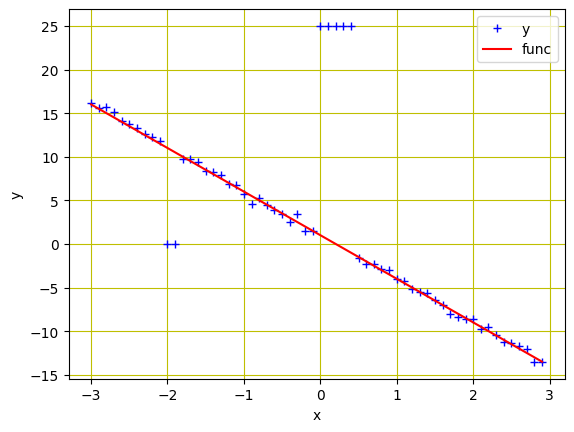

In [5]:
# Plotting and visualizing the data points
plt.plot(train_set.x.numpy(), train_set.y.numpy(), 'b+', label='y')
plt.plot(train_set.x.numpy(), train_set.func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

O compactado é:

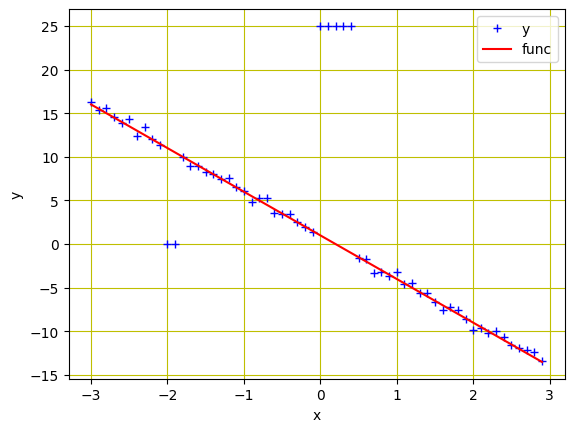

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
 
# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        # adding some outliers
        if train == True:
            self.y[10:12] = 0
            self.y[30:35] = 25
        else:
            pass
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len
 
train_set = Build_Data()
val_set = Build_Data(train=False)
 
# Plotting and visualizing the data points
plt.plot(train_set.x.numpy(), train_set.y.numpy(), 'b+', label='y')
plt.plot(train_set.x.numpy(), train_set.func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

# Construir e treinar o modelo

O pacote `nn` em `PyTorch` nos fornece muitas funções úteis. Importaremos o modelo de `regressão linear` e o `critério de Loss` do pacote `nn`. Além disso, também importaremos `DataLoader` do pacote `torch.utils.data`.

In [7]:
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
trainloader = DataLoader(dataset=train_set, batch_size=1)

Criaremos uma lista de várias `taxas de aprendizado` (Learning rates) para treinar vários modelos de uma só vez. Essa é uma prática comum entre os profissionais de aprendizado profundo, onde eles ajustam diferentes hiperparâmetros para obter o melhor modelo. Armazenaremos as perdas de treinamento e validação em tensores e criaremos uma lista vazia para `Models` armazenar nossos modelos também. Mais adiante, traçaremos os gráficos para avaliar nossos modelos.

In [8]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
train_err = torch.zeros(len(learning_rates))
val_err = torch.zeros(len(learning_rates))
Models = []

Para treinar os modelos, usaremos várias taxas de aprendizado com otimizador `estocástico de gradiente descendente` (`SGD` - Stochastic Gradient Descent). Os resultados dos dados de treinamento e validação serão salvos junto com os modelos na lista. Vamos treinar todos os modelos por $20$ épocas.

In [15]:
epochs = 20
 
# iterate through the list of various learning rates 
for i, learning_rate in enumerate(learning_rates):
    model = torch.nn.Linear(1, 1)
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    for epoch in range(epochs):
        for x, y in trainloader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
    # training data
    Y_hat = model(train_set.x)
    train_loss = criterion(Y_hat, train_set.y)
    train_err[i] = train_loss.item()
 
    # validation data
    Y_hat = model(val_set.x)
    val_loss = criterion(Y_hat, val_set.y)
    val_err[i] = val_loss.item()
    Models.append(model)

O código acima coleta Losses de treinamento e validação separadamente. Isso nos ajuda a entender o quão bem nosso treinamento pode ser, <font color="orange">por exemplo:</font> se estamos `superajustando`. É `superajustado` se descobrirmos que a perda no conjunto de validação é muito diferente da Loss no conjunto de treinamento. Nesse caso, nosso modelo treinado falhou ao generalizar para os dados que não viu, ou seja, os conjuntos de validação.

# Visualize os resultados

Acima, usamos o mesmo modelo (`regressão linear`) e treinamos com um número fixo de épocas. `A única variação é a taxa de aprendizado`. Então podemos comparar qual taxa de aprendizado nos dá o melhor modelo em termos de convergência mais rápida.

Vamos visualizar os gráficos da Loss para dados de treinamento e validação para cada taxa de aprendizado. Observando o gráfico, você pode observar que a perda é menor na taxa de aprendizado de `0.001`, o que significa que nosso modelo converge mais rapidamente nessa taxa de aprendizado para esses dados.

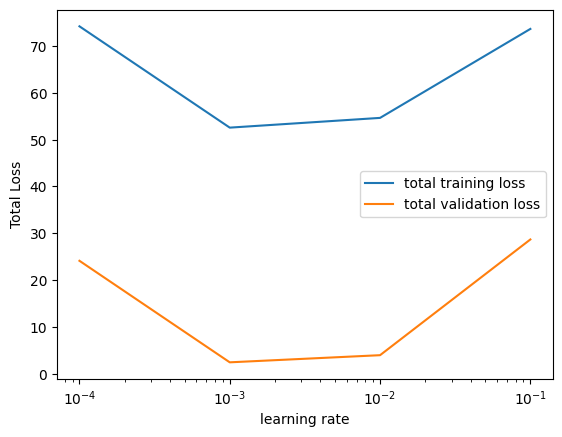

In [16]:
plt.semilogx(np.array(learning_rates), train_err.numpy(), label = 'total training loss')
plt.semilogx(np.array(learning_rates), val_err.numpy(), label = 'total validation loss')
plt.ylabel('Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Vamos também plotar as previsões de cada um dos modelos nos dados de validação. Um modelo perfeitamente convergente deve ajustar os dados perfeitamente, enquanto um modelo longe de convergir produziria previsões que estão longe dos dados.

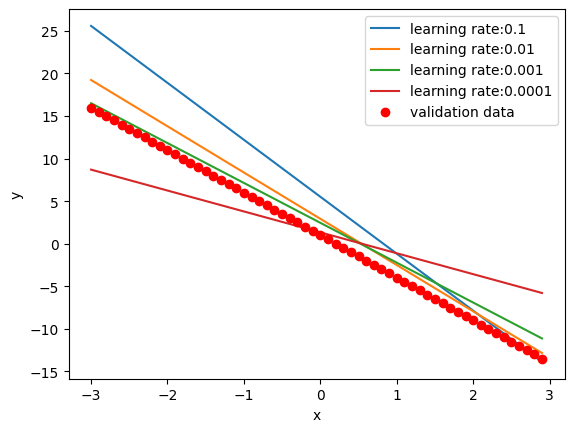

In [17]:
# plotting the predictions on validation data
for model, learning_rate in zip(Models, learning_rates):
    yhat = model(val_set.x)
    plt.plot(val_set.x.numpy(), yhat.detach().numpy(), label = 'learning rate:' + str(learning_rate))
plt.plot(val_set.x.numpy(), val_set.func.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Como você pode ver, a `linha verde` está mais próxima dos pontos de dados de validação. É a linha com a taxa de aprendizado ideal (`0.001`).

A seguir o código, compactado é:

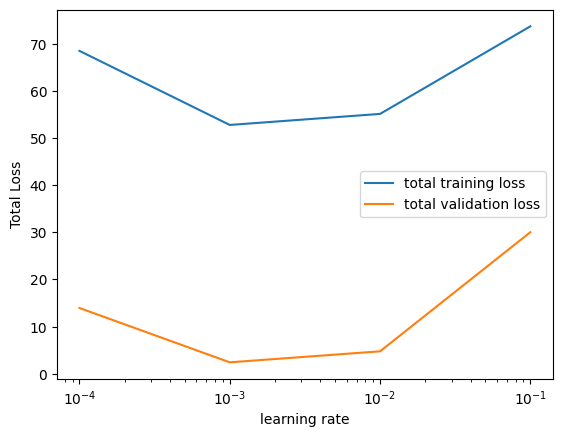

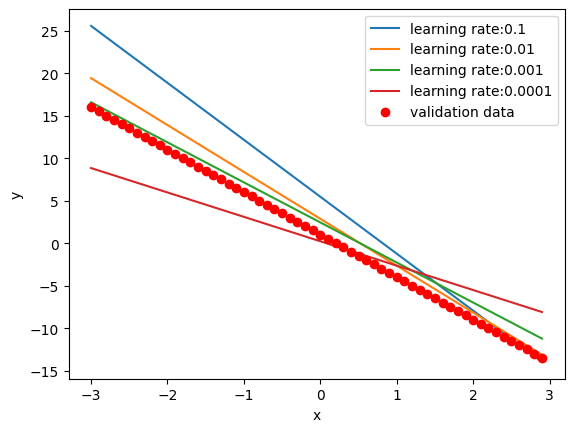

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
 

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        # adding some outliers
        if train == True:
            self.y[10:12] = 0
            self.y[30:35] = 25
        else:
            pass
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len
 
train_set = Build_Data()
val_set = Build_Data(train=False)
 
criterion = torch.nn.MSELoss()
trainloader = DataLoader(dataset=train_set, batch_size=1)
 
learning_rates = [0.1, 0.01, 0.001, 0.0001]
train_err = torch.zeros(len(learning_rates))
val_err = torch.zeros(len(learning_rates))
Models = []
 
 
epochs = 20
 
# iterate through the list of various learning rates 
for i, learning_rate in enumerate(learning_rates):
    model = torch.nn.Linear(1, 1)
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    for epoch in range(epochs):
        for x, y in trainloader:
            y_hat = model(x)
            loss = criterion(y_hat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
 
    # training data
    Y_hat = model(train_set.x)
    train_loss = criterion(Y_hat, train_set.y)
    train_err[i] = train_loss.item()
 
    # validation data
    Y_hat = model(val_set.x)
    val_loss = criterion(Y_hat, val_set.y)
    val_err[i] = val_loss.item()
    Models.append(model)
 
plt.semilogx(np.array(learning_rates), train_err.numpy(), label = 'total training loss')
plt.semilogx(np.array(learning_rates), val_err.numpy(), label = 'total validation loss')
plt.ylabel('Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()
 
# plotting the predictions on validation data
for model, learning_rate in zip(Models, learning_rates):
    yhat = model(val_set.x)
    plt.plot(val_set.x.numpy(), yhat.detach().numpy(), label = 'learning rate:' + str(learning_rate))
plt.plot(val_set.x.numpy(), val_set.func.numpy(), 'or', label = 'validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()